In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as SK
import cv2
from Tools import *


In [ ]:
def ShowTimeMul(
    Images,
    figsize=(18, 7),
    bins=32,
    Im_title=None,
    With_Hist=False,
    His_Title=None,
    colorbar=True,
    cmaps='gray',
):
    """
    Multi Image show time plotter.
    """
    if len(cmaps) == 1:
        cmaps = cmaps[0]
    n = len(Images)
    if With_Hist:
        fig, ax = plt.subplots(nrows=n, ncols=2, figsize=figsize)
        fig.subplots_adjust(wspace=0.2)

        for i in range(n):
            a = ax[i, 0].imshow(Images[i], cmap=cmaps[i])
            ax[i, 0].axis("off")
            ax[i, 0].set_title(Im_title[i])
            Loc = make_axes_locatable(ax[i, 0])
            Cax = Loc.append_axes("bottom", size="5%", pad="2%")

            if colorbar:
                fig.colorbar(a, cax=Cax, shrink=0.9, orientation="horizontal")

            Hist, Bins = SK.exposure.histogram(Images[i], nbins=bins)
            CDF, _ = SK.exposure.cumulative_distribution(Images[i], nbins=bins)
            ax[i, 1].bar(Bins, Hist, ec="black", fc="blue")
            Ex = ax[i, 1].twinx()
            Ex.plot(Bins, CDF, "r", lw=2.5)
            ax[i, 1].set_title(His_Title[i])
        fig.tight_layout()
        plt.show()

    else:
        fig, ax = plt.subplots(nrows=1, ncols=n, figsize=figsize)

        for i in range(n):
            a = ax[i].imshow(Images[i], cmap=cmaps[i])
            ax[i].axis("off")
            ax[i].set_title(Im_title[i])
            if colorbar:
                fig.colorbar(a, shrink=0.8, orientation="horizontal")
        fig.tight_layout()
        plt.show()

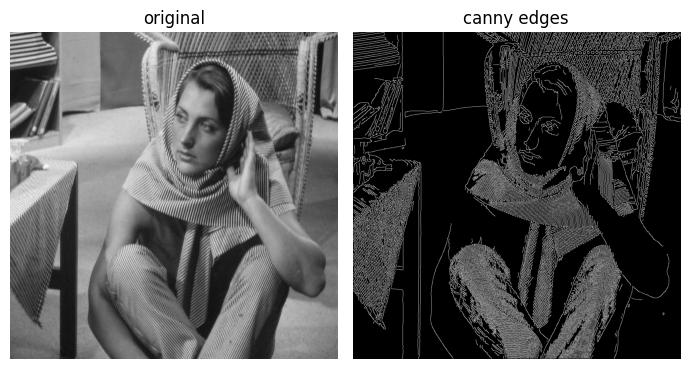

In [46]:
barbara = SK.io.imread("barbara.jpg")
edges = SK.feature.canny(barbara)

ShowTimeMul((barbara,edges),With_Hist=False,figsize=(7,5),Im_title=["original","canny edges"],cmaps=['gray']*2,colorbar=False)

In [95]:
#periodic_noise
height, width = barbara.shape
x = np.arange(width)
y = np.arange(height)
X, Y = np.meshgrid(x, y)
noise_pattern =70*np.sin(2 * np.pi *0.5 * (X + Y) / width)
    

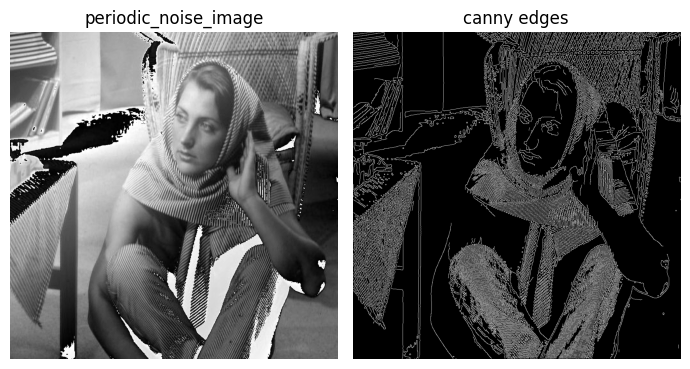

In [96]:
periodic_noise_image = barbara + noise_pattern.astype(np.uint8)
cannyEdges = SK.feature.canny(periodic_noise_image)

ShowTimeMul((periodic_noise_image,cannyEdges),With_Hist=False,figsize=(7,5),Im_title=["periodic_noise_image","canny edges"],cmaps=['gray']*2,colorbar=False)

**The Canny algorithm is sensitive to noise. Therefore, in the presence of noise, it may consider many of them as edges. On the other hand, in some areas, the presence of noise causes the existing edges in the image not to be detected..**

In [69]:
barbara_Smooth = SK.filters.gaussian(barbara,sigma=2)

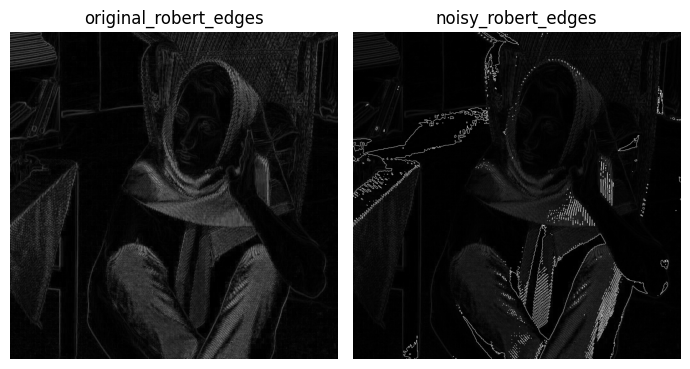

In [103]:
Edges2 = SK.filters.roberts(barbara)
robertsEdges = SK.filters.roberts(periodic_noise_image)

ShowTimeMul((Edges2,robertsEdges),With_Hist=False,figsize=(7,5),Im_title=["original_robert_edges","noisy_robert_edges"],cmaps=['gray']*2,colorbar=False)

**As you can see, When applying Roberts filter to a noisy image, two problems are clearly visible. First, this filter lacks the ability to display thin edges, so a significant number of edges are not shown. Second, this filter considers noise edges as the main edges of the image, and as you can see, the edges resulting from the noise are very pronounced.**

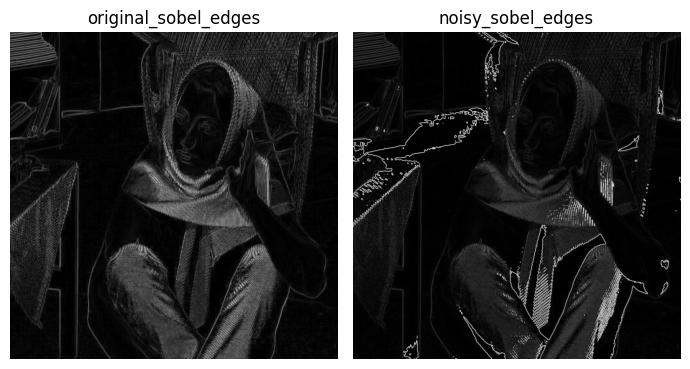

In [104]:
Edges3 = SK.filters.sobel(barbara)
sobelEdges = SK.filters.sobel(periodic_noise_image)
ShowTimeMul((Edges3,sobelEdges),With_Hist=False,figsize=(7,5),Im_title=["original_sobel_edges","noisy_sobel_edges"],cmaps=['gray']*2,colorbar=False)

**Similarly, here we see similar results using the Sobel filter as with the Roberts filter. The difference that can be observed in the images produced by these two filters, is that Sobel can display more edges in the noisy image compared to Roberts. 
(but anyway, both of them are working really bad for thinner edges. THey are hardly show only a few of them.)**

# conclusion
**In conclusion, when comparing the Roberts, Sobel, and Canny edge detection methods, it can be observed that the Canny method generally outperforms the derivative filters. The Roberts and Sobel filters have limitations in displaying thin edges and tend to consider noise edges as main edges in the image. On the other hand, the Canny method addresses these issues by effectively detecting both main edges and minimizing the influence of noise edges. It also shows better performance in displaying thinner edges and edges in darker regions. Therefore, the Canny edge detection method is often preferred for detecting edges in various types of images.**